In [1]:
%matplotlib inline

In [2]:
%run run.py

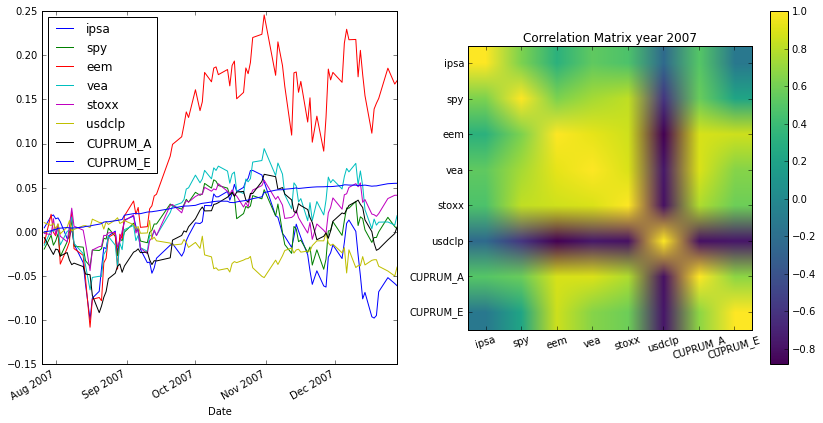

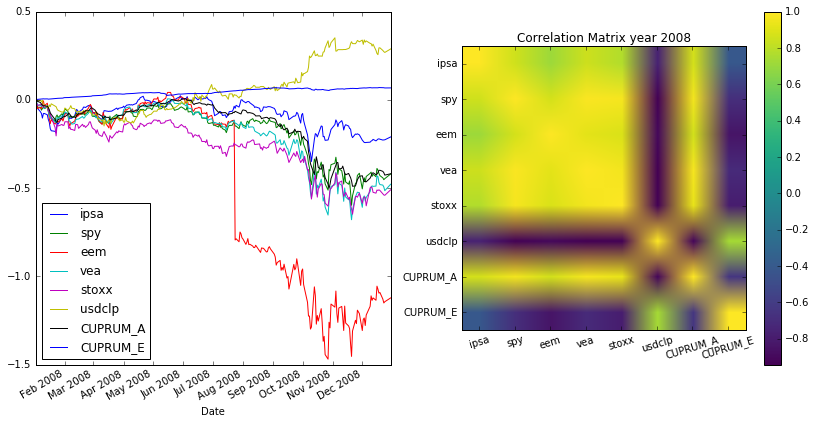

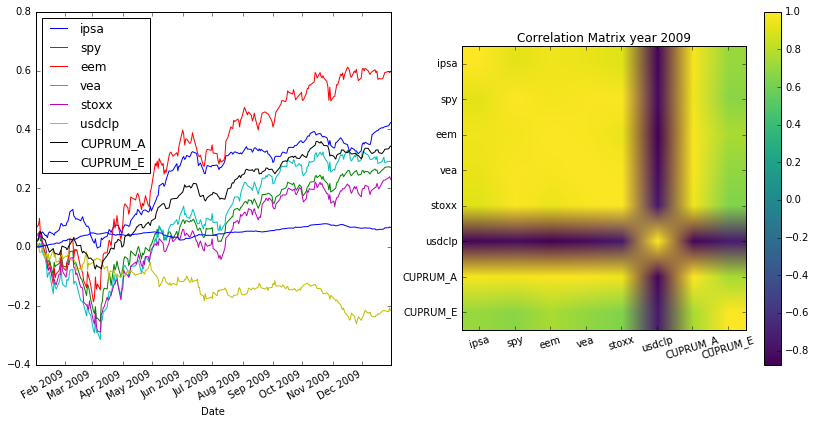

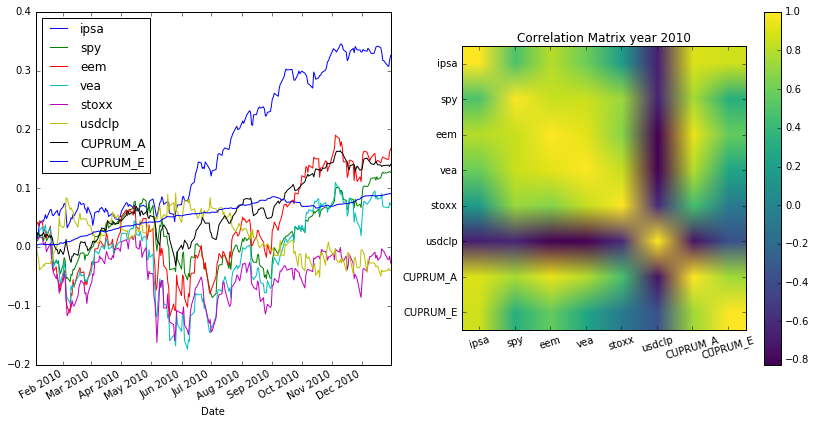

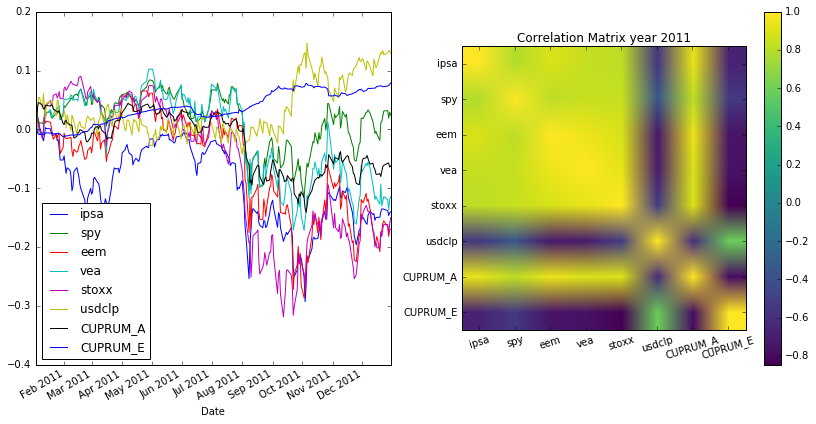

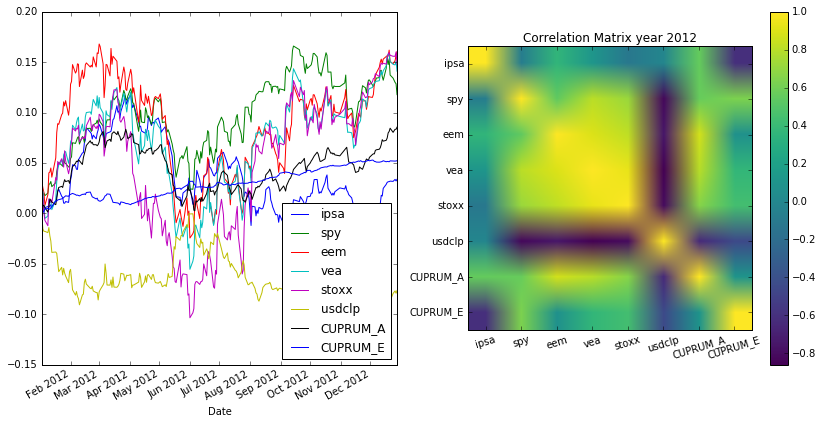

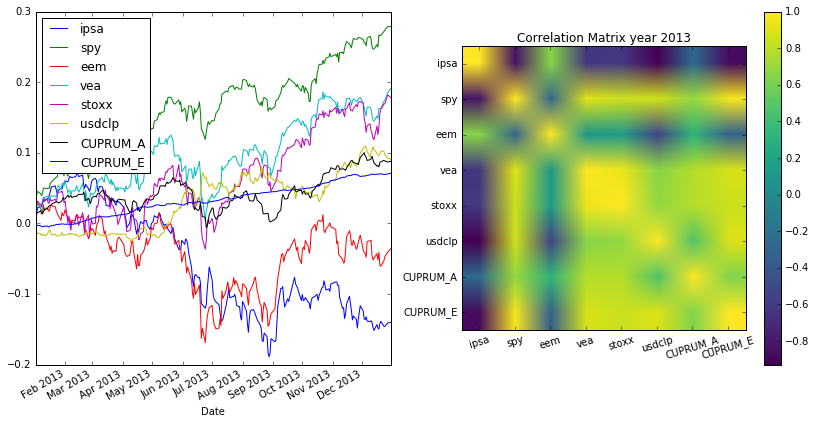

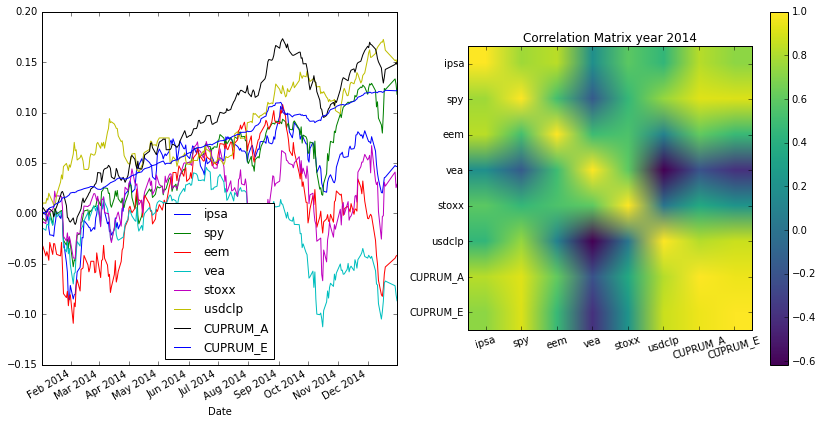

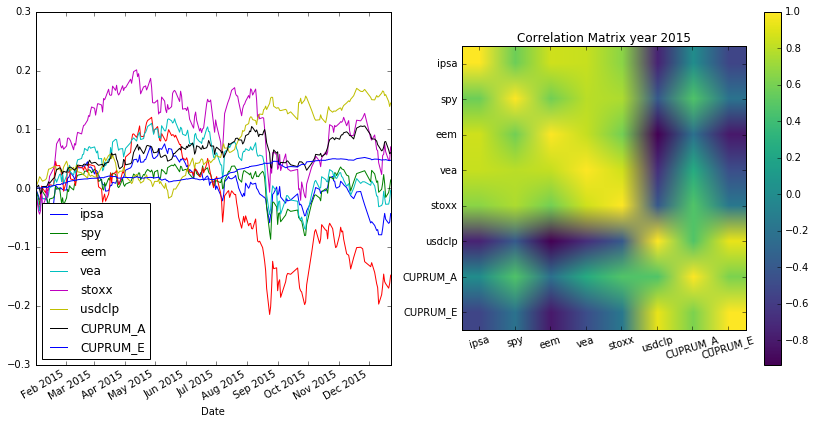

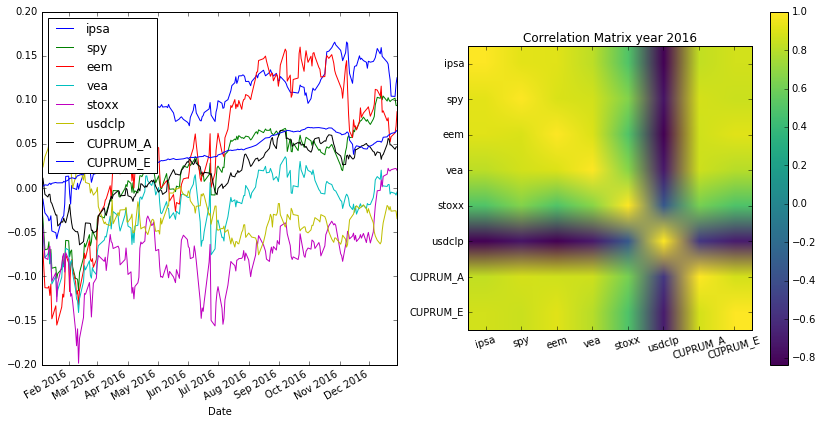

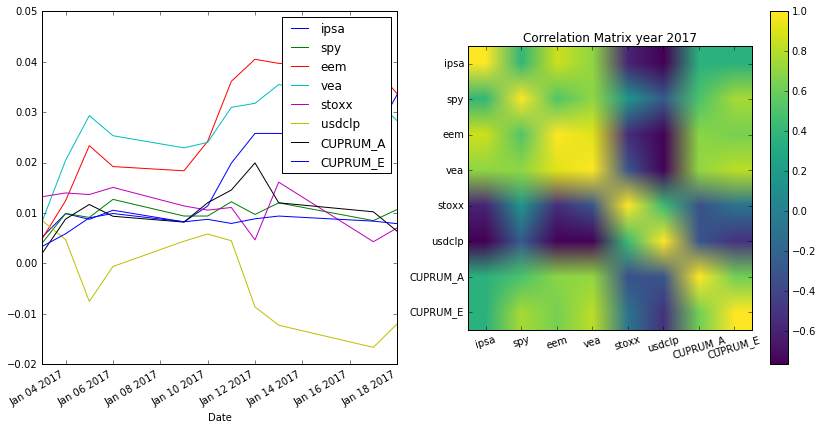

In [3]:
# Matrices de correlacion y rentabilidad acumulada anual
for yr in range(df_pct.index[0].year,df_pct.index[-1].year+1,1):
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(121)
    df_pct[str(yr)].cumsum().plot(ax=ax)
    fig.add_subplot(122)
    plt.imshow(df_pct[str(yr)].cumsum().corr(), cmap='viridis')
    plt.colorbar()
    plt.title('Correlation Matrix year %s'%(yr))
    col = df_pct.columns.values
    plt.xticks(range(col.size), col, rotation=17)
    plt.yticks(range(col.size), col)
    plt.show()

In [4]:
import statsmodels.formula.api as smf

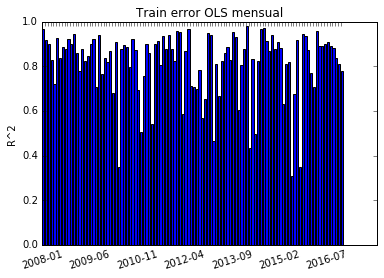

In [5]:
# OLS usando statsmodels
r2 = []
ticks = []
for yr in range(df_pct.index[0].year+1,df_pct.index[-1].year,1):
    for mon in range(1,13):
        period = '%s-%.2d'%(yr,mon)
        result = smf.ols(formula='CUPRUM_A ~ spy + ipsa + eem + vea + stoxx + usdclp', data=df_pct[period].cumsum()).fit()
        #print result.params
        #print 'Period %s R^2: %s'%(period, result.rsquared)
        r2.append(result.rsquared)
        ticks.append(period)

fig = plt.figure()
ax = fig.add_subplot(111)
l_ = len(ticks)
x_ = range(l_)
plt.bar(x_, r2)
plt.title('Train error OLS mensual')
plt.ylabel('R^2')
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*l_
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
step = int(l_/(width*1.3))
# Every step ticklable shows the month, day and year
ticklabels[::step] = ticks[::step]
plt.xticks(x_, ticklabels, rotation=17)
plt.show()

In [6]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression

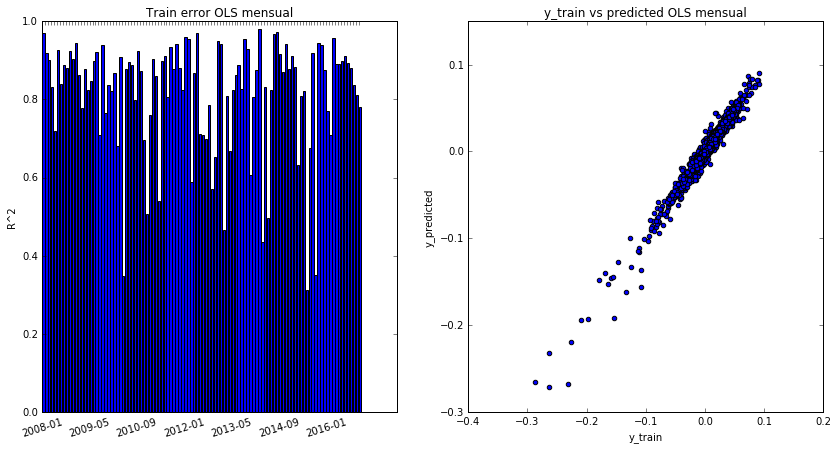

In [7]:
# OLS usando sklearn
r2 = []
ticks = []
y_train = []
y_predicted = []
for yr in range(df_pct.index[0].year+1,df_pct.index[-1].year,1):
    for mon in range(1,13):
        period = '%s-%.2d'%(yr,mon)
        y, X = dmatrices('CUPRUM_A ~ spy + ipsa + eem + vea + stoxx + usdclp', df_pct[period].cumsum())
        clf = LinearRegression()
        clf.fit(X, y)
        #print clf.coef_
        #print 'Period %s R^2: %s'%(period, clf.score(X, y))
        r2.append(clf.score(X, y))
        ticks.append(period)
        y_train += list(y.ravel())
        y_predicted += list(clf.predict(X).ravel())

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121)
l_ = len(ticks)
x_ = range(l_)
plt.bar(x_, r2)
plt.title('Train error OLS mensual')
plt.ylabel('R^2')
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*l_
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
step = int(l_/(width*1.3))
# Every step ticklable shows the month, day and year
ticklabels[::step] = ticks[::step]
plt.xticks(x_, ticklabels, rotation=17)
# Plot y_test vs predicted
ax = fig.add_subplot(122)
ax.scatter(y_train, y_predicted)
plt.title('y_train vs predicted OLS mensual')
plt.xlabel('y_train')
plt.ylabel('y_predicted')
plt.show()

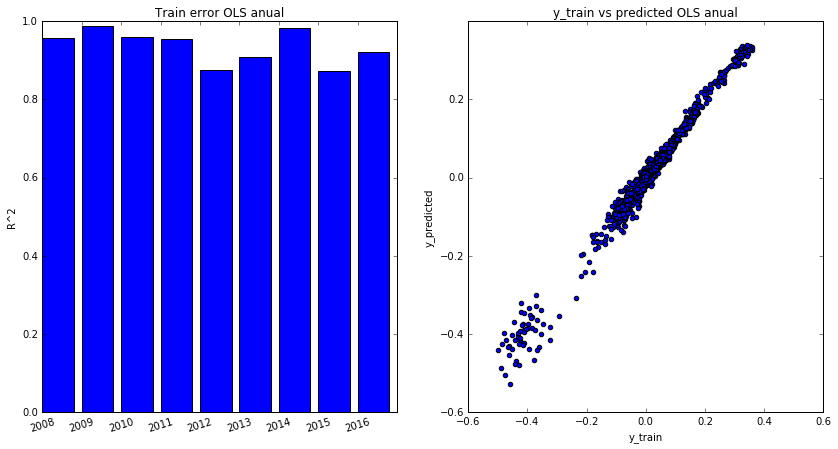

In [8]:
r2 = []
ticks = []
y_train = []
y_predicted = []
for yr in range(df_pct.index[0].year+1,df_pct.index[-1].year,1):
    period = '%s'%(yr)
    y, X = dmatrices('CUPRUM_A ~ spy + ipsa + eem + vea + stoxx + usdclp', df_pct[period].cumsum())
    clf = LinearRegression()
    clf.fit(X, y)
    #print clf.coef_
    #print 'Period %s R^2: %s'%(period, clf.score(X, y))
    r2.append(clf.score(X, y))
    ticks.append(period)
    y_train += list(y.ravel())
    y_predicted += list(clf.predict(X).ravel())

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121)
l_ = len(ticks)
x_ = range(l_)
plt.bar(x_, r2)
plt.title('Train error OLS anual')
plt.ylabel('R^2')
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*l_
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
step = int(l_/(width*1.3))
# Every step ticklable shows the year
ticklabels[::step] = ticks[::step]
plt.xticks(x_, ticklabels, rotation=17)
# Plot y_test vs predicted
ax = fig.add_subplot(122)
ax.scatter(y_train, y_predicted)
plt.title('y_train vs predicted OLS anual')
plt.xlabel('y_train')
plt.ylabel('y_predicted')
plt.show()

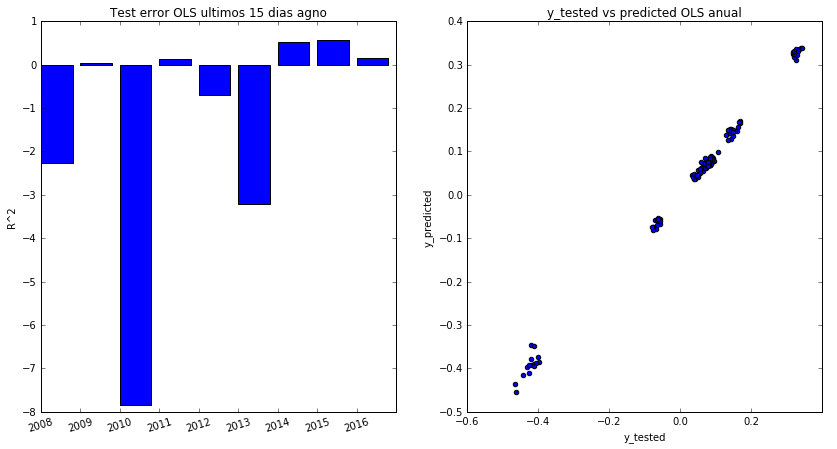

In [9]:
# Ultimos p dias del agno
p = -15
r2 = []
ticks = []
y_tested = []
y_predicted = []
for yr in range(df_pct.index[0].year+1,df_pct.index[-1].year,1):
    period = '%s'%(yr)
    y, X = dmatrices('CUPRUM_A ~ spy + ipsa + eem + vea + stoxx + usdclp', df_pct[period].cumsum())
    X_train = X[:p]
    X_test = X[p:]
    y_train = y[:p]
    y_test = y[p:]
    clf = LinearRegression()
    clf.fit(X, y)
    #print clf.coef_
    #print 'Period %s R^2: %s'%(period, clf.score(X, y))
    r2.append(clf.score(X_test, y_test))
    ticks.append(period)
    y_tested += list(y_test.ravel())
    y_predicted += list(clf.predict(X_test).ravel())

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121)
l_ = len(ticks)
x_ = range(l_)
plt.bar(x_, r2)
plt.title('Test error OLS ultimos %s dias agno'%abs(p))
plt.ylabel('R^2')
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*l_
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
step = int(l_/(width*1.3))
# Every step ticklable shows the year
ticklabels[::step] = ticks[::step]
plt.xticks(x_, ticklabels, rotation=17)
# Plot y_test vs predicted
ax = fig.add_subplot(122)
ax.scatter(y_tested, y_predicted)
plt.title('y_tested vs predicted OLS anual')
plt.xlabel('y_tested')
plt.ylabel('y_predicted')
plt.show()

[[ 0.          0.04765294  0.15966836 -0.05465166 -0.07937852  0.09706851
   0.02398206]]
R^2: -0.354953386278


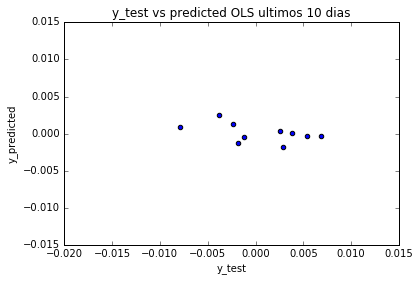

In [10]:
# Ultimos prueba p dias y entrena ultimos d dias
d = -365
p = -10
y, X = dmatrices('CUPRUM_A ~ spy + ipsa + eem + vea + stoxx + usdclp', df_pct[d:])
X_train = X[:p]
X_test = X[p:]
y_train = y[:p]
y_test = y[p:]
clf = LinearRegression()
clf.fit(X_train, y_train)
print clf.coef_
print 'R^2: %s'%(clf.score(X_test, y_test))
predicted = clf.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
plt.title('y_test vs predicted OLS ultimos %s dias'%abs(p))
plt.xlabel('y_test')
plt.ylabel('y_predicted')

In [11]:
X_test.shape

(10L, 7L)